In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [94]:
def sort_vertices(pts):
    xpts = pts[:, 0]
    ypts = pts[:, 1]
    xc = np.sum(xpts) / len(xpts)
    yc = np.sum(ypts) / len(ypts)
    theta = np.arctan2(ypts - yc, xpts - xc) * 180 / np.pi
    indices = np.argsort(theta)
    return pts[indices]

def compute_intx_pt(a, b):
    pt1, pt2 = a
    pt3, pt4 = b
    den = np.cross(pt1 - pt2, pt3 - pt4)
    nums = np.cross(pt1, pt2) * (pt3 - pt4) - np.cross(pt3, pt4) * (pt1 - pt2)
    return nums / den


def fillPoly(poly):
    plt.figure(figsize=(5, 5))
    sorted_poly = sort_vertices(poly)
    plt.scatter(sorted_poly[:, 0], sorted_poly[:, 1])
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    ymin, ymax = np.min(sorted_poly[:, 1]), np.max(sorted_poly[:, 1])
    edges = np.empty((len(sorted_poly), 4))
    for i in range(len(sorted_poly)):
        a, b = sorted_poly[i], sorted_poly[(i + 1) % len(sorted_poly)]
        if a[1] <= b[1]:
            a, b = b, a
        edges[i] = [a[0], a[1], b[0], b[1]]
    edges[np.lexsort((edges[:, 2], edges[:, 3][::-1], edges[:, 1][::-1]))]
    y = ymax
    while y >= ymin:
        active_edges = []
        for edge in edges:
            if y > edge[3] and y <= edge[1]:
                active_edges.append(edge)
        x_intersects = []
        for edge in active_edges:
            scanline = np.array([0, y, 100, y]).reshape(2, 2)
            intx_pt = compute_intx_pt(scanline, edge.reshape(2, 2))
            x_intersects.append(intx_pt[0])
        x_intersects.sort()
        for i in range(0, len(x_intersects), 2):
            a, b = x_intersects[i], x_intersects[i + 1]
            a, b = int(a), int(b)
            plt.scatter(np.arange(a, b + 1), np.ones(b - a + 1) * y, color="orange", alpha=0.3)
        y -= 1
    plt.show()

Polygon vertices
(40, 8)
(41, 68)
(56, 18)
(34, 17)
(96, 33)


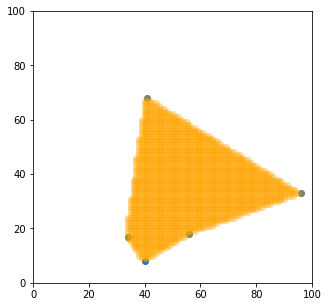

In [97]:
polysize = np.random.randint(3, 10)
pts = np.random.randint(1, 100, (polysize, 2))
print("Polygon vertices")
print("\n".join(list(map(str, list(zip(pts[:, 0], pts[:, 1]))))))
fillPoly(pts)